In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random
import matplotlib
from cycler import cycler
import random

### initialization

In [2]:
params = {
        "image.cmap": "tab20c",
        "font.size": 16,
        "font.family": "Arial",
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "legend.title_fontsize": 16,
        "figure.figsize": (8, 8),
        "axes.xmargin": 0.1,
        "axes.ymargin": 0.04}
plt.rcParams.update(params)

In [12]:
plt.rcParams["axes.prop_cycle"]

'#8dd3c7'
'#ffffb3'
'#bebada'
'#fb8072'
'#80b1d3'
'#fdb462'
'#b3de69'
'#fccde5'
'#d9d9d9'
'#bc80bd'
'#ccebc5'


In [9]:
type(plt.rcParams["axes.prop_cycle"])

cycler.Cycler

In [21]:
# get cycler from Set3 palette
from pylab import *
cmap1 = cm.get_cmap('tab20b')    # PiYG
cmap2 = cm.get_cmap('tab20c')
cycler_colors = []
for i in range(cmap1.N):
    rgba = cmap1(i)
    # rgb2hex accepts rgb or rgba
    cycler_colors.append(matplotlib.colors.rgb2hex(rgba))
for i in range(cmap2.N):
    rgba = cmap2(i)
    # rgb2hex accepts rgb or rgba
    cycler_colors.append(matplotlib.colors.rgb2hex(rgba))

In [29]:
random.shuffle(cycler_colors)

In [30]:
plt.rcParams["axes.prop_cycle"] = cycler(color = cycler_colors)

### load data

In [3]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"

In [4]:
df_bin = pd.read_csv(path + "test_bin_table.txt", sep = "\t", header = 0, index_col = 0).T
df_bin_meta = pd.read_csv(path + "test_bin_meta_table.txt", sep = "\t", header = 0, index_col = 0)
df_DEG = pd.read_csv(path + "DEGs_cell.txt", sep = "\t", header = 0, index_col = 0)

In [5]:
np.unique(df_DEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)

In [6]:
df_subsetDEG = df_DEG.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["Status", "pts"], ascending = [True, False])
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
MALAT1,B cells,16.935381,0.253655,1.905770e-62,1.221441e-60,0.999223,0.997873
RPS2,B cells,41.362907,0.915839,0.000000e+00,0.000000e+00,0.998834,0.979231
RPL13,B cells,44.911869,1.014175,0.000000e+00,0.000000e+00,0.998445,0.975973
RPS19,B cells,45.142956,1.049590,0.000000e+00,0.000000e+00,0.998057,0.971765
RPL13A,B cells,47.070755,1.153605,0.000000e+00,0.000000e+00,0.997668,0.970317


In [7]:
# reorder df_bin
df_bin_meta = df_bin_meta.sort_values(["cell", "stim"])
df_bin = df_bin.loc[:, list(df_bin_meta.index.values)]

NameError: name 'df_heatmap' is not defined

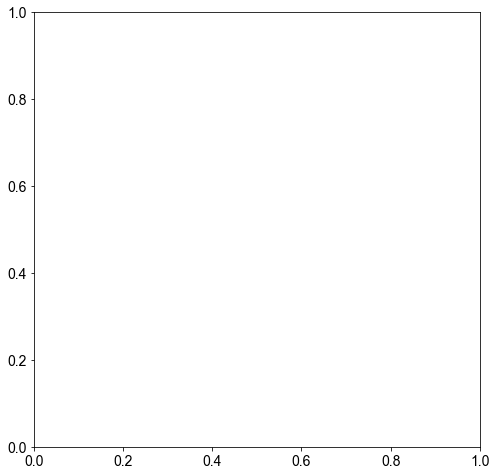

In [8]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

#### load shred output

In [9]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"
df_heatmap = pd.read_csv(path + "heatmap_matrix.txt", sep = "\t", header = 0, index_col = 0)
df_bin_meta = pd.read_csv(path + "bin_metadata.txt", sep = "\t", header = 0, index_col = 0)
df_deg_module = pd.read_csv(path + "deg_shredplan.txt", sep = "\t", header = 0, index_col = 0)

/Users/kang/miniconda3/envs/aipy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_heatmap.shape

(5200, 994)

Text(68.0, 0.5, 'gene modules')

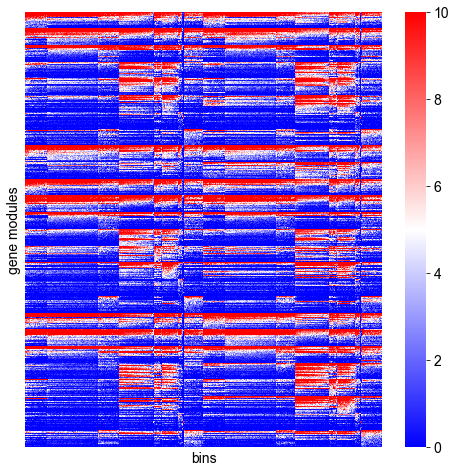

In [11]:
fig, ax = plt.subplots()
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, cmap = "bwr", ax = ax)
ax.set_xlabel("bins")
ax.set_ylabel("gene modules")

In [12]:
counts = np.random.normal(100,20,994)

<BarContainer object of 994 artists>

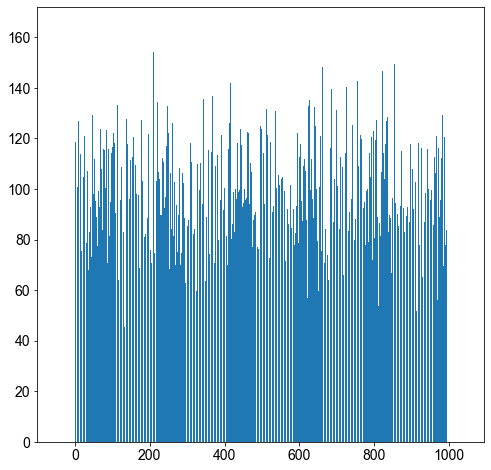

In [13]:
fig, ax = plt.subplots()
ax.bar(x = list(range(994)), height = counts)

In [14]:
df_subsetDEG = df_deg_module.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["shred_plan", "reference_group", "Status", "pts"], ascending = [True, True, True, False])

In [15]:
df_subsetDEG["reference_group"] = df_subsetDEG["reference_group"].fillna("")
df_subsetDEG["shred_plan"] = df_subsetDEG["shred_plan"].fillna("")

In [87]:
?ax1.legend

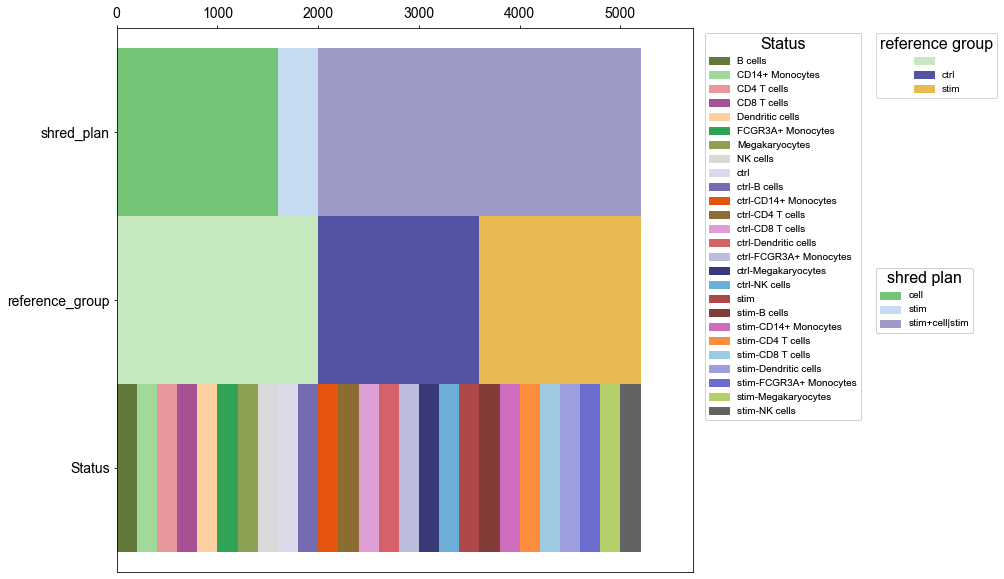

In [126]:
fig = plt.figure(figsize = (15,10))
gs = GridSpec(nrows = 1, ncols = 3, width_ratios = (0.7, 0.2, 0.1))
gs.update(wspace = 0.025)

ax0 = fig.add_subplot(gs[0,0])
columns = ["Status", "reference_group","shred_plan"]
labels_all = []

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_subsetDEG[column])
    labels_all += list(labels)
    label_counts = dict(df_subsetDEG[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax0.barh(y = column, width = count, height = 1, left = count_aggregrated)
        ax0.xaxis.tick_top()
        count_aggregrated += count

colors = [matplotlib.colors.rgb2hex(ax0.patches[i].get_facecolor()) for i in range(len(ax0.patches))]
handles = [plt.Rectangle((0,0),1,1, color = i) for i in colors]

ax1 = fig.add_subplot(gs[0,1])

leg1 = ax1.legend(handles[:26], labels_all[:26], prop = {'size': 10}, loc = 'upper left', title = "Status", ncol=1)
ax1.add_artist(leg1)

ax2 = fig.add_subplot(gs[0,2])
leg2 = ax2.legend(handles[26:29], labels_all[26:29], prop = {'size': 10}, loc = 'upper left',title = "reference group")
leg3 = ax2.legend(handles[29:], labels_all[29:], prop = {'size': 10}, loc = 'center left',title = "shred plan")

ax2.add_artist(leg2)
ax2.add_artist(leg3)
ax1.axis('off')
ax2.axis('off')
plt.show()

In [68]:
for i in range(len(ax.patches)):
    color = matplotlib.colors.rgb2hex(ax.patches[i].get_facecolor())
    print(color)

In [43]:
df_bin_meta = df_bin_meta.loc[df_heatmap.columns, : ]
df_bin_meta.head()

,stim,cell
ctrl-B cells-bin-0,ctrl,B cells
ctrl-B cells-bin-1,ctrl,B cells
ctrl-B cells-bin-2,ctrl,B cells
ctrl-B cells-bin-3,ctrl,B cells
ctrl-B cells-bin-4,ctrl,B cells


### draw the heatmap

/Users/kang/miniconda3/envs/aipy/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator


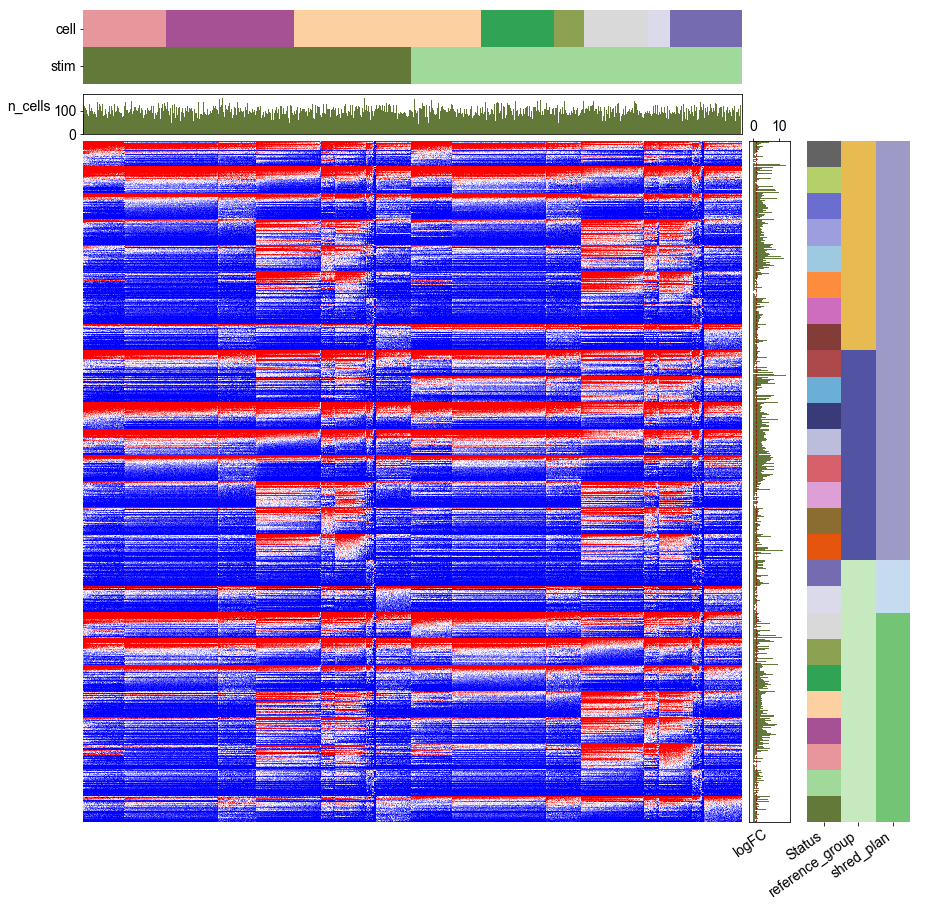

In [32]:
fig = plt.figure(figsize = (15,15))
gs = GridSpec(nrows = 3, ncols = 4, height_ratios=(0.10,0.05, 0.85), width_ratios = (0.75,0.05,0.08,0.12))
gs.update(wspace = 0.025, hspace = 0.025)

# bin metadata barplot
ax3 = fig.add_subplot(gs[0,0])
columns = df_bin_meta.columns

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_bin_meta[column])
    label_counts = dict(df_bin_meta[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax3.barh(y = column, width = count, height = 1, left = count_aggregrated)
        ax3.set_xticklabels("")
        ax3.set_xticks([])
        count_aggregrated += count
# ax3.set_yticklabels(columns, rotation = 45)
ax3.set_xlim(0,994)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False) 
ax3.spines['top'].set_visible(False) 
ax3.spines['bottom'].set_visible(False) 

# n_cell histograms
ax0 = fig.add_subplot(gs[1,0])
ax0.bar(x = list(range(994)), height = counts, width = 1)
ax0.set_xticklabels("")
ax0.set_xticks([])
ax0.set_xlim(0,994)
ax0.set_ylabel("n_cells", rotation = 0, labelpad = 24)


# gene module barplots
ax1 = fig.add_subplot(gs[2,2])
columns = ["Status", "reference_group","shred_plan"]

for column in columns:
    count_aggregrated = 0
    labels = np.unique(df_subsetDEG[column])
    label_counts = dict(df_subsetDEG[column].value_counts())
    for label in labels:
        count = label_counts[label]
        ax1.bar(x = column, height = count, width = 1, bottom = count_aggregrated)
        ax1.set_yticklabels("")
        ax1.set_yticks([])
        count_aggregrated += count
ax1.set_xticklabels(columns, rotation = 35, ha = "right")
ax1.set_ylim(0,5200)
ax1.spines['left'].set_visible(False) 
ax1.spines['right'].set_visible(False) 
ax1.spines['top'].set_visible(False) 
ax1.spines['bottom'].set_visible(False) 

# gene module score histogram
ax4 = fig.add_subplot(gs[2,1])
ax4.barh(y = list(range(5200)), width = list(df_subsetDEG["logfoldchanges"]), height = 1)
ax4.xaxis.tick_top()
ax4.set_yticklabels("")
ax4.set_yticks([])
ax4.set_ylim(0,5200)
ax4.set_xlabel("logFC",rotation = 35, ha = "right")
ax4.plot([-np.log10(0.05), -np.log10(0.05)], [0, 5200], color = "#990000", linestyle = "dashed", lw = 0.8)

# heatmap itself
ax2 = fig.add_subplot(gs[2,0])
sns.heatmap(df_heatmap, vmin = 0, vmax = 10, yticklabels=False, xticklabels=False, 
            cmap = "bwr", ax = ax2, cbar = False)
ax2.set_ylabel("")

# add legend for bin metadata
ax5 = fig.add_subplot(gs[0, 3])
ax5.

# add legend for gene module annotation
ax6 = fig.add_subplot(gs[2, 3])

fig.savefig(path + "heatmap.png")

#637939
#a1d99b
#e7969c
#a55194
#fdd0a2
#31a354
#8ca252
#d9d9d9
#dadaeb
#756bb1

In [ ]:
### draw correlation heatmap

In [137]:
from scipy.stats import pearsonr

In [136]:
df_corr_bin = pd.DataFrame(index = df_heatmap.columns, columns = df_heatmap.columns)
df_corr_bin.head(2)

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,ctrl-B cells-bin-6,ctrl-B cells-bin-7,ctrl-B cells-bin-8,ctrl-B cells-bin-9,...,stim-NK cells-bin-47,stim-NK cells-bin-48,stim-NK cells-bin-49,stim-NK cells-bin-50,stim-NK cells-bin-51,stim-NK cells-bin-52,stim-NK cells-bin-53,stim-NK cells-bin-54,stim-NK cells-bin-55,stim-NK cells-bin-56
ctrl-B cells-bin-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl-B cells-bin-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
for i in range(df_corr_bin.shape[1]):
    if i % 5 == 0:
        print(i)
    for j in range(i, df_corr_bin.shape[1]):
        corr = pearsonr(list(df_heatmap.iloc[:,i]), list(df_heatmap.iloc[:,j]))
        df_corr_bin.iloc[i,j] = corr; df_corr_bin.iloc[j,i] = corr

0
5


KeyboardInterrupt: 

### clustering

In [77]:
df_toppcluster = pd.read_csv(path + "toppcluster_modules.txt", sep = "\t", header = 0, index_col = 0)

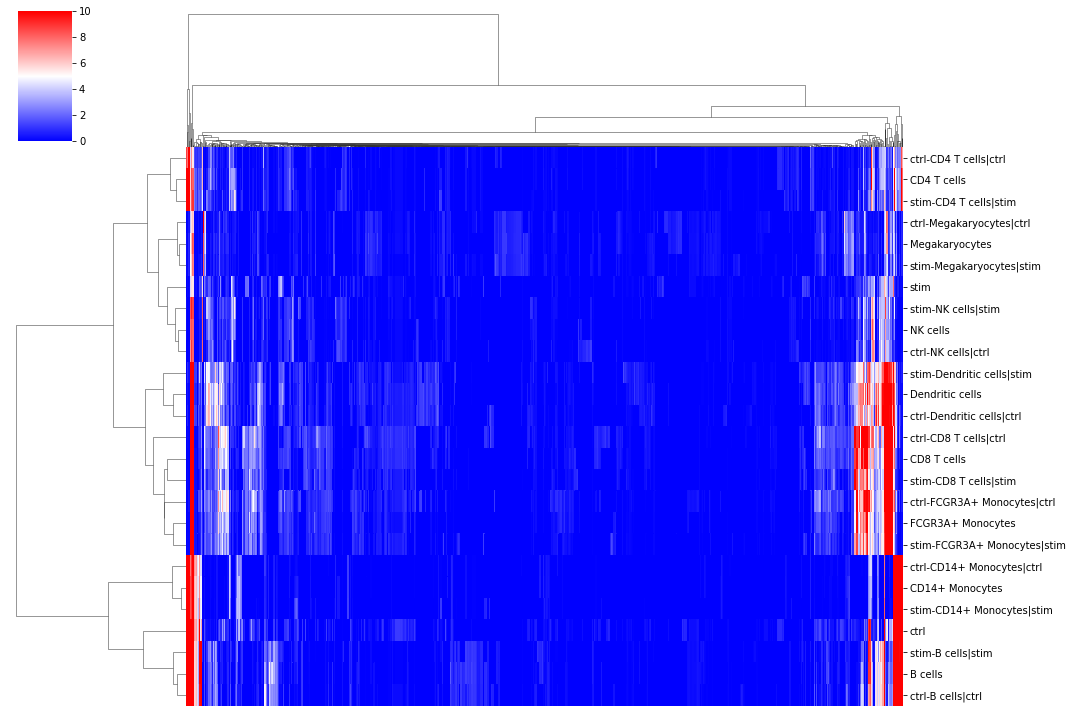

In [83]:
sns.clustermap(df_toppcluster, vmin = 0, vmax = 10,
               figsize=(15,10), xticklabels = False, yticklabels = True, cmap = "bwr")

In [34]:
df_test = pd.DataFrame(data = np.array([['1','a'],
                                        ['2','a'],
                                        ['3','b']]),
                      index = [1,2,3], columns = ["col1","col2"])

In [42]:
a = (df_test["col2"].value_counts())

In [44]:
a[list(np.unique(df_test["col2"]))]

a    2
b    1
Name: col2, dtype: int64

In [57]:
df_bin_meta.head()

,stim,cell
bin_id,,
stim-B cells-bin-0,stim,B cells
stim-CD8 T cells-bin-0,stim,CD8 T cells
ctrl-B cells-bin-0,ctrl,B cells
ctrl-CD14+ Monocytes-bin-0,ctrl,CD14+ Monocytes
ctrl-Megakaryocytes-bin-0,ctrl,Megakaryocytes


In [58]:
np.unique(df_bin_meta["cell"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)